<a href="https://colab.research.google.com/github/thisishasan/slda/blob/main/SL%26DA_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
# Load dataset
data = pd.read_csv("car_price_assignment.csv")

In [ ]:
# Explore the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
print(data.describe())

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

In [ ]:
print(data.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print(data.isnull().sum())


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


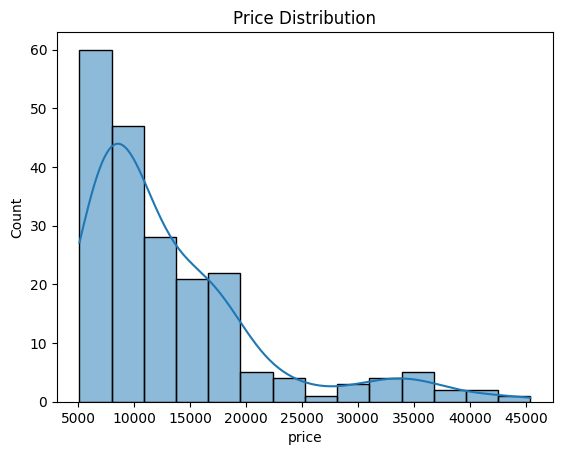

In [ ]:
# Visualizations
sns.histplot(data['price'], kde=True)
plt.title("Price Distribution")
plt.show()

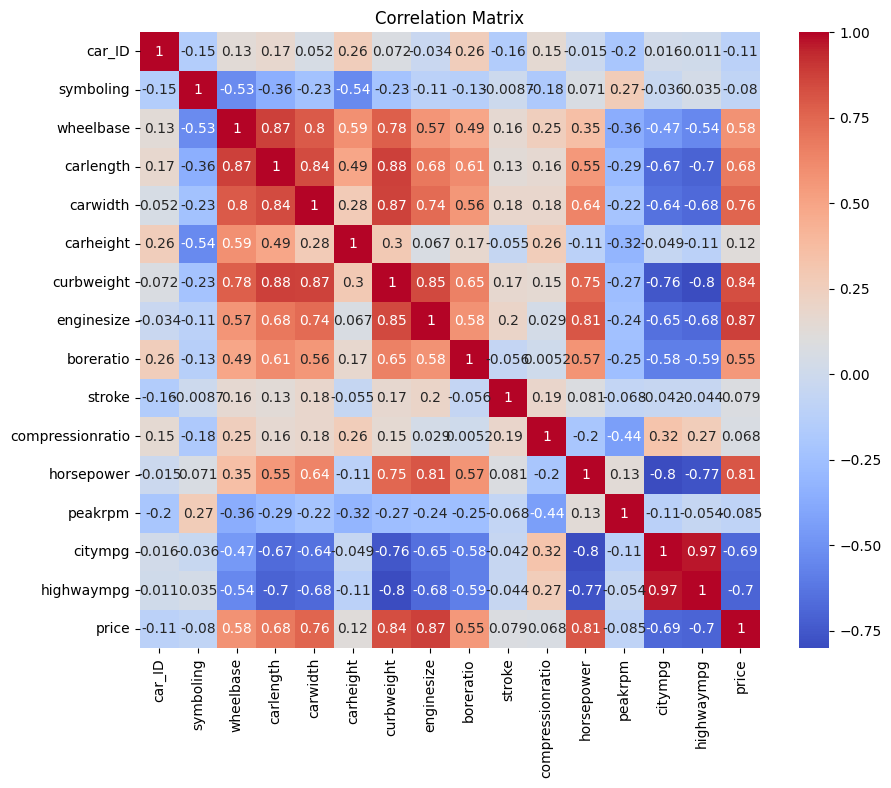

In [ ]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

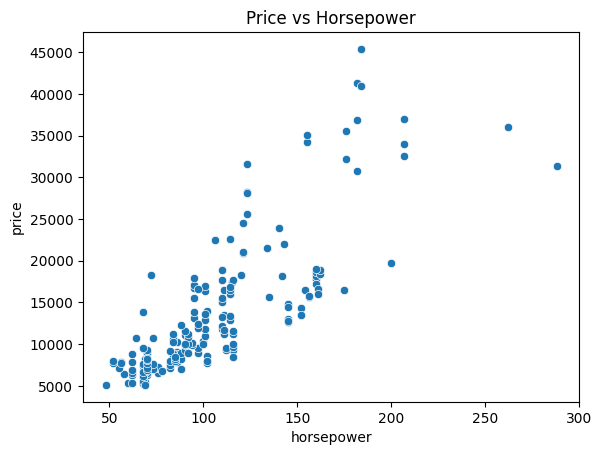

In [ ]:
# Scatter plot of price vs. some numeric feature
sns.scatterplot(x='horsepower', y='price', data=data)
plt.title("Price vs Horsepower")
plt.show()

In [ ]:
# Encoding categorical variables
data = pd.get_dummies(data, drop_first=True)

# Check for outliers in the target variable (Price)
from scipy.stats import zscore

data['z_score_price'] = zscore(data['price'])
data = data[data['z_score_price'].abs() <= 3]  # Keeping only rows within 3 std dev

# Drop the temporary z_score column
data.drop(columns=['z_score_price'], inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Splitting data into features and target
X = data.drop(columns=['price'])
y = data['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = linear_model.predict(X_test)
print("Linear Regression:")
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
print("\nRidge Regression:")
print("R²:", r2_score(y_test, y_pred_ridge))
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("RMSE:", mean_squared_error(y_test, y_pred_ridge, squared=False))

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
print("\nLasso Regression:")
print("R²:", r2_score(y_test, y_pred_lasso))
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("RMSE:", mean_squared_error(y_test, y_pred_lasso, squared=False))


Linear Regression:
R²: -1.725148919028086
MAE: 9605.544677136162
RMSE: 15175.578969783797

Ridge Regression:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R²: 0.9020948863183554
MAE: 2012.6506550673753
RMSE: 2876.423558947114

Lasso Regression:
R²: 0.6979966696396503
MAE: 3233.040731614376
RMSE: 5051.914771976421


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.162e+07, tolerance: 6.822e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.feature_selection import RFE

# Recursive Feature Elimination
rfe = RFE(estimator=LinearRegression(), n_features_to_select=10)
rfe.fit(X_train, y_train)

# Selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['boreratio', 'CarName_bmw z4', 'CarName_buick opel isuzu deluxe',
       'CarName_buick skylark', 'CarName_jaguar xf', 'CarName_jaguar xj',
       'CarName_jaguar xk', 'enginelocation_rear', 'cylindernumber_three',
       'cylindernumber_twelve'],
      dtype='object')


In [ ]:
# Coefficients for Linear Model
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linear_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)


                              Feature   Coefficient
29                     CarName_bmw z4  43144.782420
25                     CarName_bmw x1  41059.777928
26                     CarName_bmw x3  39573.604188
24                   CarName_bmw 320i  37966.272485
18                CarName_audi 100 ls  36104.861630
..                                ...           ...
145       CarName_volkswagen 411 (sw) -32420.817098
147      CarName_volkswagen model 111 -32869.426860
149  CarName_volkswagen rabbit custom -33063.210330
160                 CarName_vw rabbit -36006.967879
148         CarName_volkswagen rabbit -53670.457263

[190 rows x 2 columns]
